# Ouray Defensible Space - Data Analysis (pre-modeling)

Author: **Bryce A Young** (git bryceayoung) | 
Created: **2024-02-15** | 
Modified: **2025-02-19**

In this notebook, we analyze data relationships and distributions of defensible space features of buildings in Ouray County. The dataframe that we use for this analysis was created in `hiz/ouray_hiz.ipynb`.

#### Data 
- (tabular) hiz_feat.csv

#### Workflow 
- Unstructured, freeform exploration of data distributions and relationships (it might be messy)

## Step 0: Setup Environment
---

In [1]:
import os
### Directory ###
# Repository
os.chdir(r'D:/_PROJECTS/P001_OurayParcel/ouray')
# Root workspace
ws = r'D:/_PROJECTS/P001_OurayParcel'

### Data paths ###
# Folder where all the data inputs and outputs will live
data = os.path.join(ws, 'data')
# Scratch folder (contains footprint centroids with hiz info)
scratch = os.path.join(data, '_temp')
# Any final outputs go here
out = os.path.join(data, '_out')
# Figures to export
figs = os.path.join(out, 'figures')

# Ensure correct working directory
os.getcwd()

'D:\\_PROJECTS\\P001_OurayParcel\\ouray'

## Step 1: Non-Spatial Data Analysis
---

In [2]:
import pandas as pd

df = pd.read_csv(os.path.join(out, 'hiz_feat.csv'))
df.head()

,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections
0,Ouray County,5,221.938317,NaN,NaN,NaN,NaN,0
1,Ouray County,5,11.936200,0.079294,0.119998,0.066202,0.003467,2
2,Ouray County,1,213.672097,0.032280,0.038839,0.006272,0.000000,0
3,Ouray County,5,183.675975,0.063696,0.097281,0.033223,0.082861,0
4,Ouray County,5,101.386718,0.037428,0.219677,0.253634,0.000842,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4533 entries, 0 to 4532
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   County         4533 non-null   object 
 1   wui_class      4533 non-null   int64  
 2   min_ssd        4533 non-null   float64
 3   mean_cc0_2m    4513 non-null   float64
 4   mean_cc2_4m    4513 non-null   float64
 5   mean_cc4_8m    4513 non-null   float64
 6   mean_cc8_40m   4513 non-null   float64
 7   intersections  4533 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 283.4+ KB


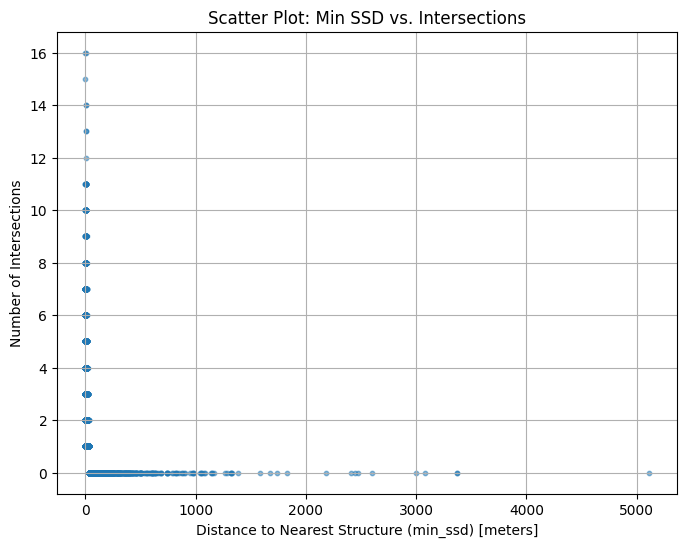

In [3]:
import matplotlib.pyplot as plt

# Scatter plot of min_ssd vs. intersections
plt.figure(figsize=(8, 6))
plt.scatter(df['min_ssd'], df['intersections'], alpha=0.5, s=10)
plt.xlabel('Distance to Nearest Structure (min_ssd) [meters]')
plt.ylabel('Number of Intersections')
plt.title('Scatter Plot: Min SSD vs. Intersections')
plt.grid(True)
plt.show()

<Axes: ylabel='min_ssd'>

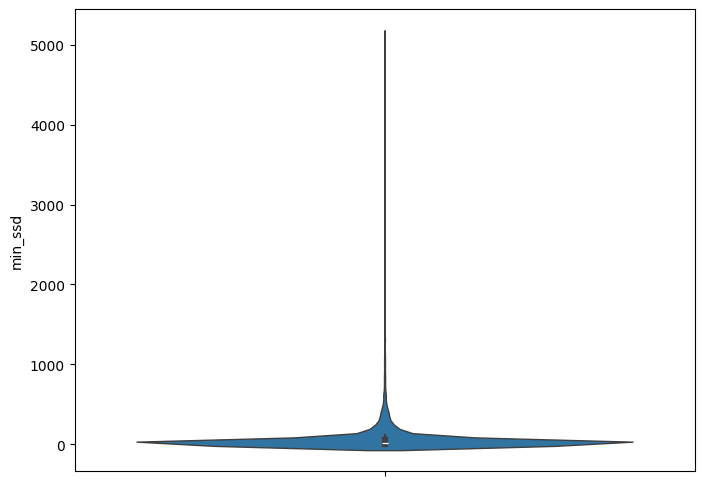

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot for min_ssd
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['min_ssd'], inner="box", linewidth=1)

<Axes: ylabel='intersections'>

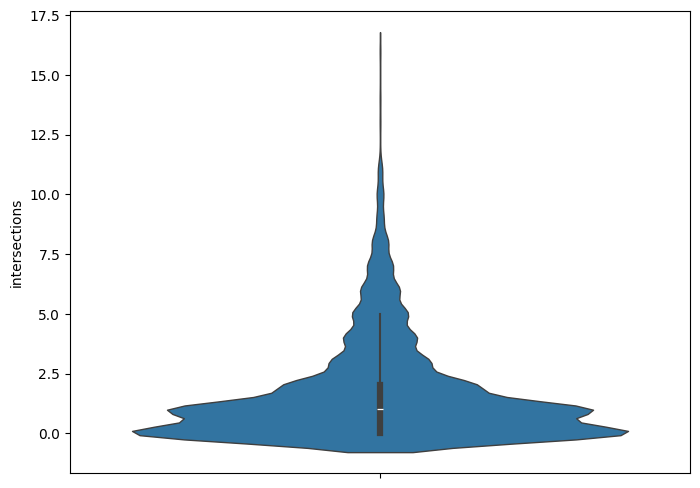

In [5]:
# Create a violin plot for number of adjacent structures
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['intersections'], inner="box", linewidth=1)

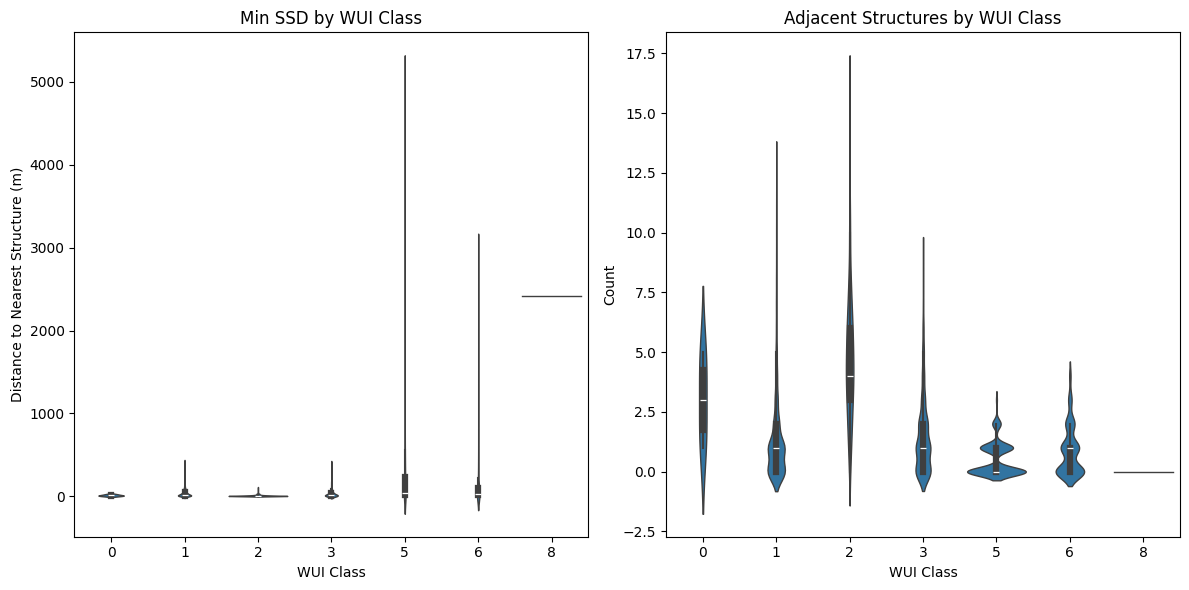

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Violin plot for min_ssd grouped by wui_class
plt.subplot(1, 2, 1)
sns.violinplot(x=df['wui_class'], y=df['min_ssd'], inner="box", linewidth=1)
plt.xlabel("WUI Class")
plt.ylabel("Distance to Nearest Structure (m)")
plt.title("Min SSD by WUI Class")

# Violin plot for intersections grouped by wui_class
plt.subplot(1, 2, 2)
sns.violinplot(x=df['wui_class'], y=df['intersections'], inner="box", linewidth=1)
plt.xlabel("WUI Class")
plt.ylabel("Count")
plt.title("Adjacent Structures by WUI Class")

# Show the plots
plt.tight_layout()
plt.show()

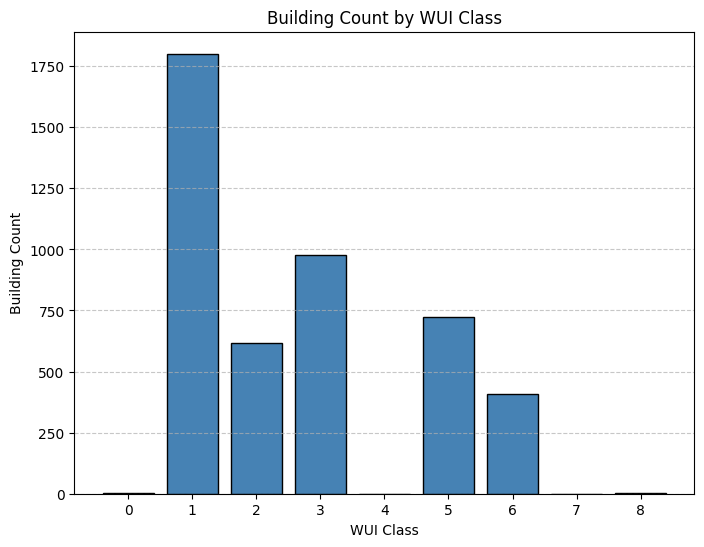

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Count the number of homes per WUI class
wui_counts = df['wui_class'].value_counts().sort_index()
# Ensure classes 4 and 7 are displayed even if they have no data
wui_classes = np.arange(0, 9)  # WUI classes 0 through 8
wui_counts = wui_counts.reindex(wui_classes, fill_value=0)
# Plot bar chart
plt.figure(figsize=(8, 6))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(wui_classes)  # Ensure all WUI classes are labeled
plt.bar(wui_counts.index, wui_counts.values, color="steelblue", edgecolor="black")
# Labels and title
plt.xlabel("WUI Class")
plt.ylabel("Building Count")
plt.title("Building Count by WUI Class")

plt.show()

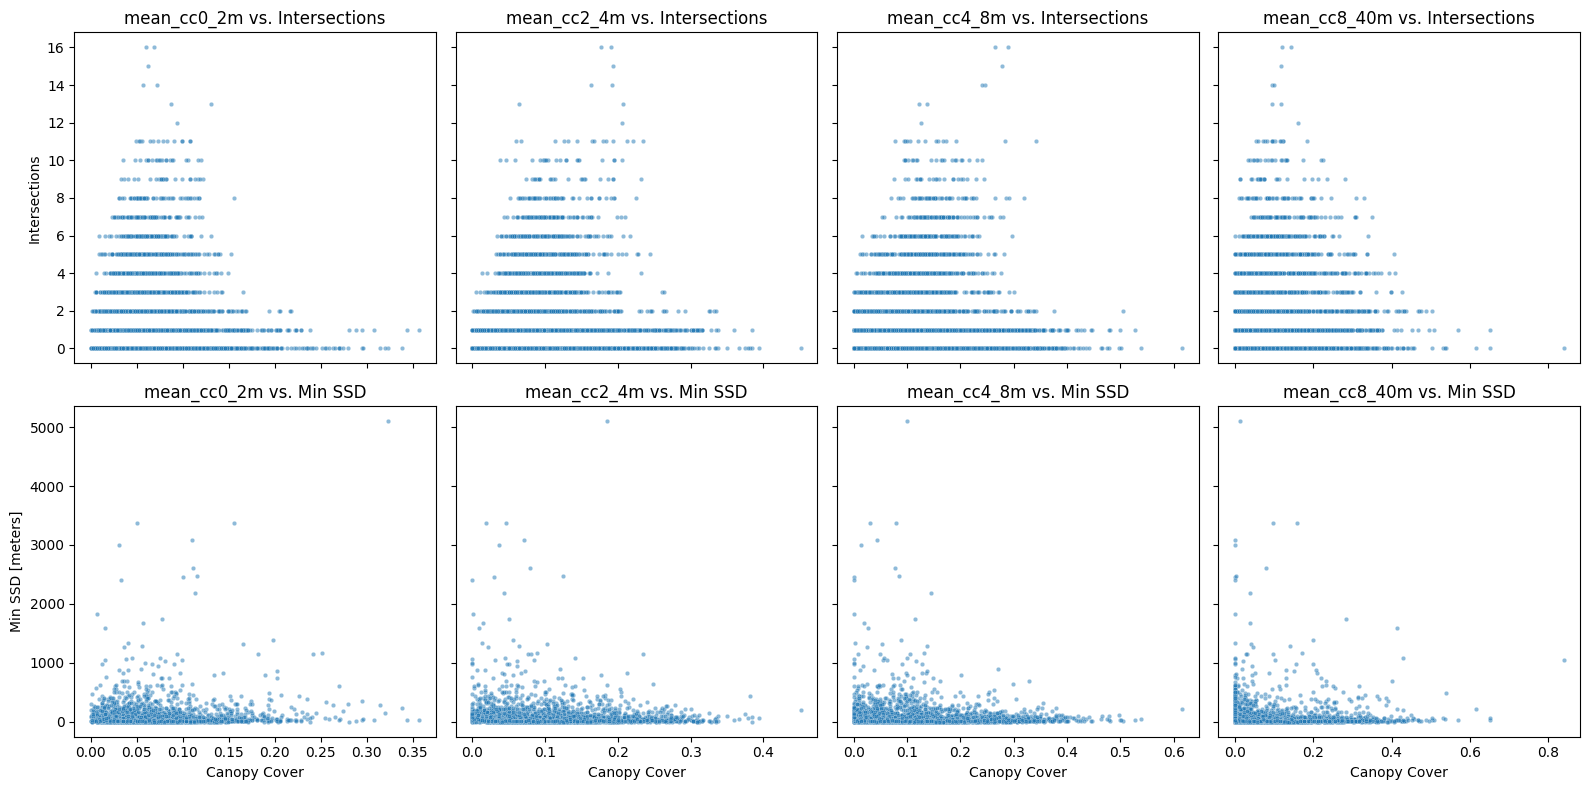

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the grid layout for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey='row', sharex='col')

# Canopy cover classes
canopy_classes = ['mean_cc0_2m', 'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m']

# Plot each canopy cover class against intersections (top row) and min_ssd (bottom row)
for i, cc in enumerate(canopy_classes):
    # Scatter plot: canopy cover vs. intersections
    sns.scatterplot(x=df[cc], y=df['intersections'], alpha=0.5, s=10, ax=axes[0, i])
    axes[0, i].set_title(f"{cc} vs. Intersections")
    axes[0, i].set_xlabel("")
    axes[0, i].set_ylabel("Intersections" if i == 0 else "")

    # Scatter plot: canopy cover vs. min_ssd
    sns.scatterplot(x=df[cc], y=df['min_ssd'], alpha=0.5, s=10, ax=axes[1, i])
    axes[1, i].set_title(f"{cc} vs. Min SSD")
    axes[1, i].set_xlabel("Canopy Cover")
    axes[1, i].set_ylabel("Min SSD [meters]" if i == 0 else "")

plt.tight_layout()
plt.show()


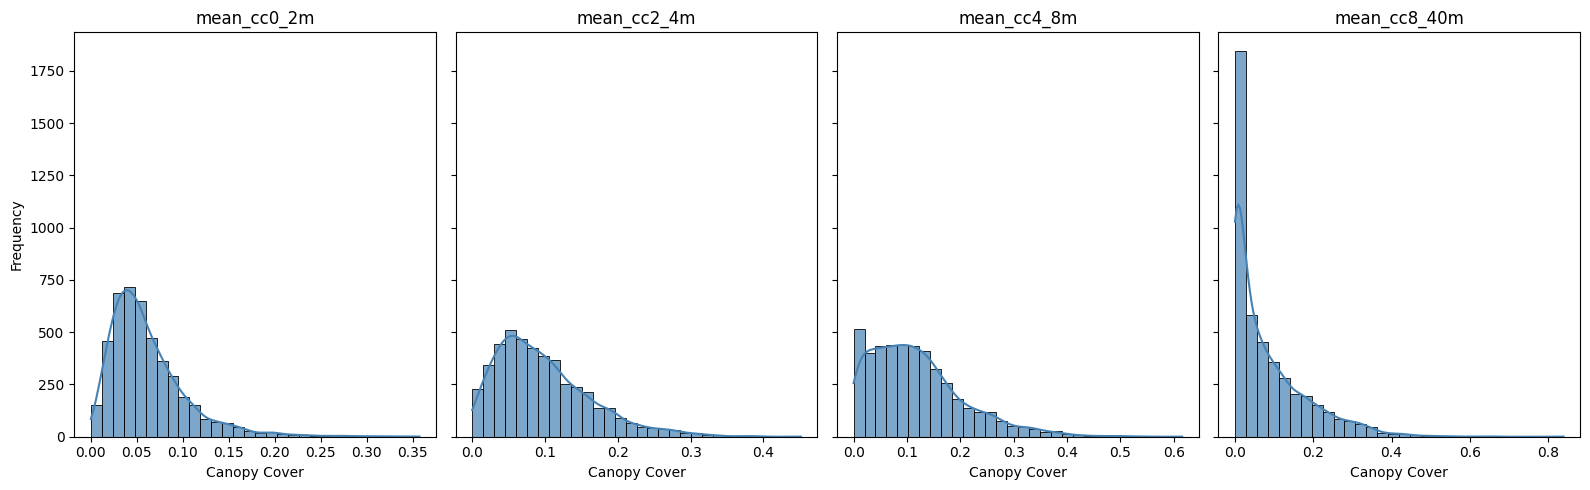

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with subplots for KDE overlays on separate canopy cover histograms
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5), sharey=True)

# Canopy cover classes
canopy_classes = ['mean_cc0_2m', 'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m']

# Plot histogram with KDE overlay for each canopy cover metric
for i, cc in enumerate(canopy_classes):
    sns.histplot(df[cc].dropna(), bins=30, kde=True, color="steelblue", edgecolor="black", alpha=0.7, ax=axes[i])
    axes[i].set_title(cc)
    axes[i].set_xlabel("Canopy Cover")
    if i == 0:
        axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



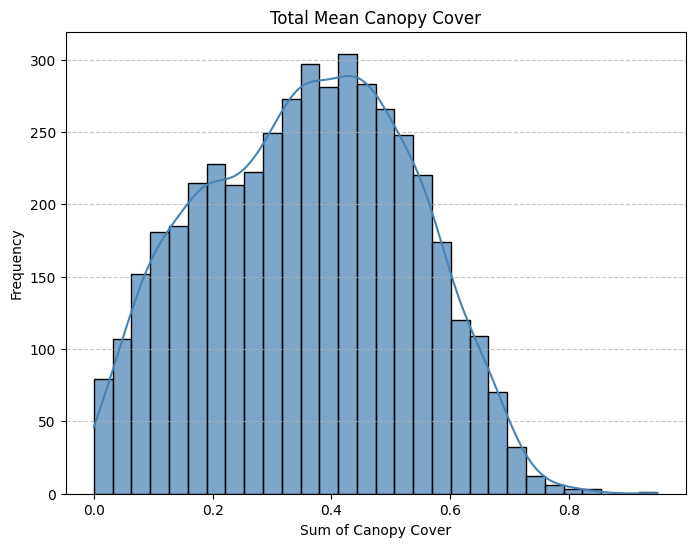

In [19]:
# KDE overlay for the aggregate sum of canopy cover
plt.figure(figsize=(8, 6))
sns.histplot(df["sum_cc"].dropna(), bins=30, kde=True, color="steelblue", edgecolor="black", alpha=0.7)
plt.xlabel("Sum of Canopy Cover")
plt.ylabel("Frequency")
plt.title("Total Mean Canopy Cover")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()



## Step 2: Spatial Data Analysis
---

<Axes: >

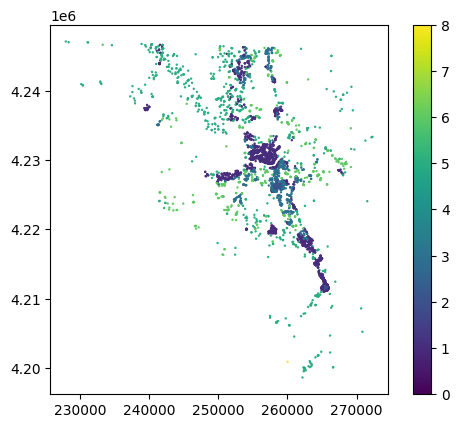

In [29]:
import geopandas as gpd
# Read in building centroids with defensible space features
gdf = gpd.read_file(os.path.join(scratch, 'centr_wui_ssd_count_rast.gpkg'))
# Plot by wui class
gdf.plot(column='wui_class', legend=True, markersize=.5)

<Axes: >

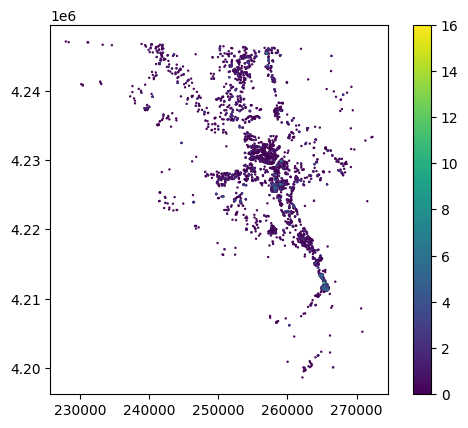

In [30]:
# Plot by number of adjacent structures
gdf.plot(column='intersections', legend=True, markersize=.5)

<Axes: >

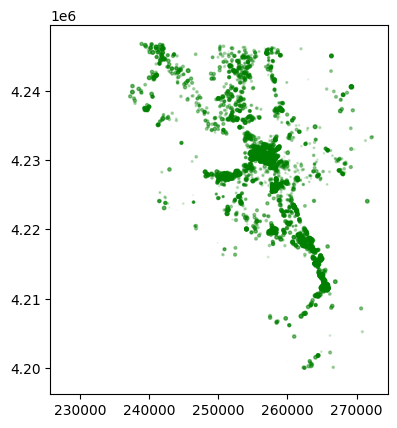

In [ ]:
# Create new column for sum_cc
gdf['sum_cc'] = gdf[['mean_cc0_2m', 'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m']].sum(axis=1)
# Plot varying point size and alpha by sum_cc
gdf.plot(markersize=gdf["sum_cc"] * 10, alpha=gdf['sum_cc'], color="green")

We can see that canopy cover is highest where structure density is highest, at least at first glance (with the exception of the large area west of Ridgeway). This means we should rename canopy cover to fuel cover because it's not just canopy. It's also adjacent structures.

### Testing spatial autocorrelation

In [ ]:
import libpysal as ps
import esda

# Create a spatial weights matrix using K-Nearest Neighbors (k=8)
w = ps.weights.KNN.from_dataframe(gdf, k=8)
# row-standardize the weights (for moran's i)
w.transform = "R"

# Sum of canopy cover
y = gdf['sum_cc'].values
moran = esda.moran.Moran(y, w)

print(f"Moran's I: {moran.I: .4f}")
print(f"p-value: {moran.p_sim: .4f}")

Moran's I:  0.5490
p-value:  0.0010


d:\venv\python\parcel\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Moran's I is a relatively high positive value, indicating positive autocorrelation (similar values cluster together) for sum of canopy cover, with statistical significance (low p-value).

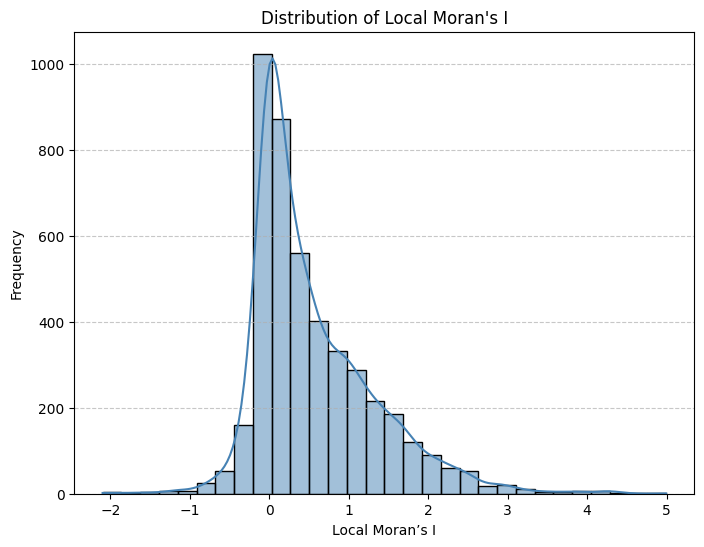

In [36]:
# Compute Local Moran's I
lisa = esda.moran.Moran_Local(y, w)

# Add results to gdf for mapping
gdf["local_moran"] = lisa.Is
gdf["p_value"] = lisa.p_sim

# Plot Local Moran's I values
plt.figure(figsize=(8, 6))
sns.histplot(gdf["local_moran"], bins=30, kde=True, color="steelblue")
plt.xlabel("Local Moran’s I")
plt.ylabel("Frequency")
plt.title("Distribution of Local Moran's I")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

The plot above shows a local analysis of Moran's I for sum_cc. We can see that most values are clustered around 0, which suggests that there is no spatial autocorrelation. However, there are some negative values, suggesting that there are neighboring structures with outlier cc values. Since KNN=8 uses the 8 nearest structures, my inference is that very low Moran's I values are for structures with high separation distance, which can be upwards of 5km in this dataset. There are also some extremely high values (up to +4 and +5) which suggest extreme clustering in some areas. This would suggest that where one building has high canopy cover, its neighbors also have high canopy cover. This is expected based on the literature review. This bodes well for creating clusters of building archetypes through clustering and principal components.

In [38]:
print(gdf['local_moran'].describe())

count    4533.000000
mean        0.548911
std         0.762648
min        -2.096885
25%         0.009748
50%         0.310060
75%         0.947015
max         4.994423
Name: local_moran, dtype: float64


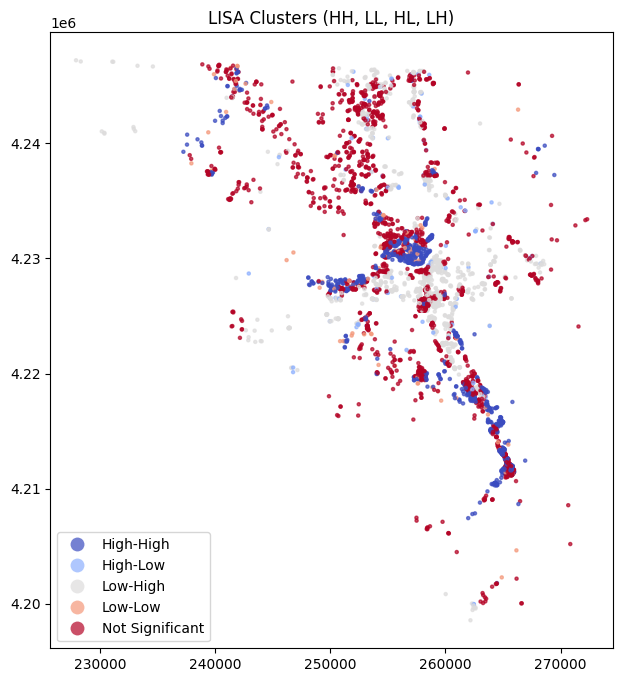

In [41]:
import matplotlib.pyplot as plt

# Define significant clusters (p < 0.05)
gdf["lisa_cluster"] = "Not Significant"
gdf.loc[(gdf["local_moran"] > 0) & (gdf["p_value"] < 0.05), "lisa_cluster"] = "High-High"
gdf.loc[(gdf["local_moran"] < 0) & (gdf["p_value"] < 0.05), "lisa_cluster"] = "Low-Low"
gdf.loc[(gdf["local_moran"] > 0) & (gdf["p_value"] < 0.05) & (gdf["sum_cc"] < gdf["sum_cc"].mean()), "lisa_cluster"] = "Low-High"
gdf.loc[(gdf["local_moran"] < 0) & (gdf["p_value"] < 0.05) & (gdf["sum_cc"] > gdf["sum_cc"].mean()), "lisa_cluster"] = "High-Low"

# Plot the LISA clusters
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column="lisa_cluster", categorical=True, legend=True, ax=ax, cmap="coolwarm", markersize=5, alpha=0.7)
plt.title("LISA Clusters (HH, LL, HL, LH)")
plt.show()


Explanation for above plot (k=8):  
- High-High: A hotspot - buildings with high canopy cover surrounded by high canopy cover  
- High-Low: Spatial outlier - a building with high canopy cover but surrounded by low canopy cover
- Low-Low: A coldspot - buildings with low canopy cover surrounded by low canopy cover  
- Low-High: Spatial outlier - a building with low canopy cover surrounded by high canopy cover


In [43]:
# Drop rows with NaN values in canopy metrics
gdf = gdf.dropna(subset=['mean_cc0_2m', 'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m'])

In [45]:
# Spatial autocorrelation of individual cc class values
w = ps.weights.KNN.from_dataframe(gdf, k=8)
w.transform = "R"

canopy_columns = ["mean_cc0_2m", "mean_cc2_4m", "mean_cc4_8m", "mean_cc8_40m"]
# Loop through each canopy cover column and compute Local Moran's I
for col in canopy_columns:
    y = gdf[col].values  # Extract the column values
    moran = esda.moran.Moran(y, w)  # Compute Moran’s I
    
    # Print the results for each column
    print(f"Local Moran's I for {col}: {moran.I:.4f}")
    print(f"p-value: {moran.p_sim:.4f}")
    print("-" * 40)  # Separator for readability

d:\venv\python\parcel\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Local Moran's I for mean_cc0_2m: 0.4177
p-value: 0.0010
----------------------------------------
Local Moran's I for mean_cc2_4m: 0.5322
p-value: 0.0010
----------------------------------------
Local Moran's I for mean_cc4_8m: 0.5520
p-value: 0.0010
----------------------------------------
Local Moran's I for mean_cc8_40m: 0.5823
p-value: 0.0010
----------------------------------------


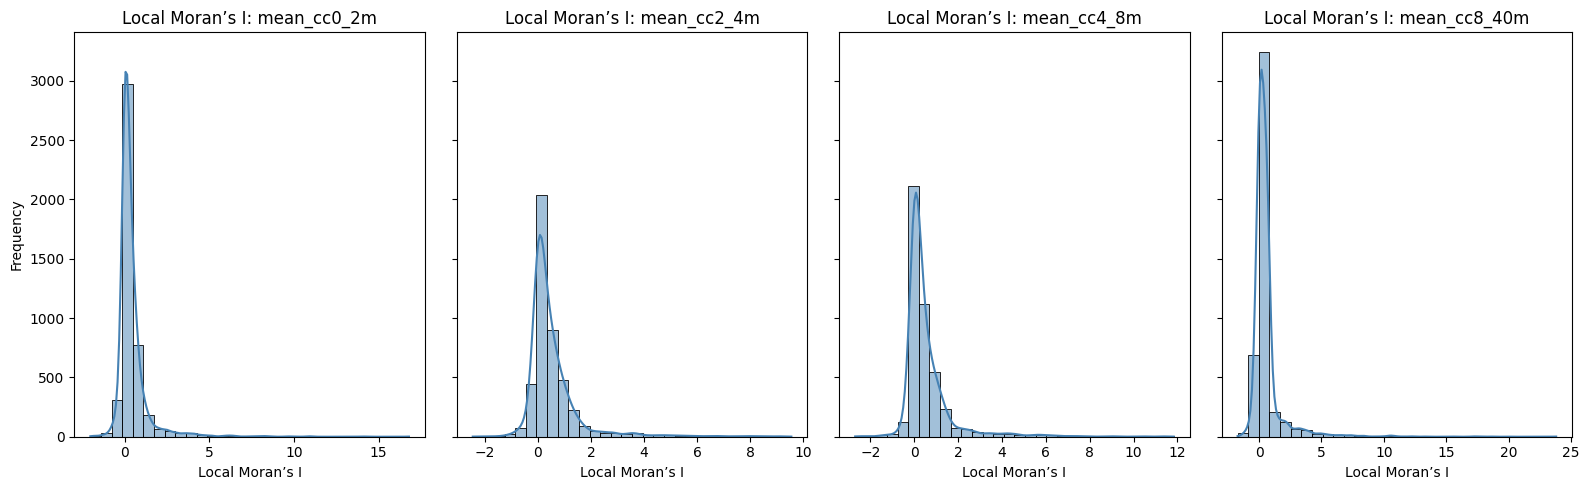

In [48]:
# Create a figure with 4 subplots (one for each canopy cover column)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5), sharey=True)

# Loop through each canopy cover column and compute Local Moran's I
for i, col in enumerate(canopy_columns):
    y = gdf[col].values  # Extract column values
    lisa = esda.moran.Moran_Local(y, w)  # Compute Local Moran’s I

    # Store the Local Moran's I results in gdf
    gdf[f"local_moran_{col}"] = lisa.Is
    gdf[f"p_{col}"] = lisa.p_sim

    # Plot histogram for this column's Local Moran's I values
    sns.histplot(gdf[f"local_moran_{col}"], bins=30, kde=True, color="steelblue", ax=axes[i])
    axes[i].set_title(f"Local Moran’s I: {col}")
    axes[i].set_xlabel("Local Moran’s I")
    if i == 0:
        axes[i].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [49]:
gdf.head()

,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,geometry,sum_cc,...,p_value,lisa_cluster,local_moran_mean_cc0_2m,local_moran_mean_cc2_4m,local_moran_mean_cc4_8m,local_moran_mean_cc8_40m,p_mean_cc0_2m,p_mean_cc2_4m,p_mean_cc4_8m,p_mean_cc8_40m
1,Ouray County,5,11.936200,0.079294,0.119998,0.066202,0.003467,2,POINT (242785.257 4243534.402),0.268961,...,0.231,Not Significant,0.469513,0.270210,0.006343,0.469205,0.006,0.024,0.480,0.023
2,Ouray County,1,213.672097,0.032280,0.038839,0.006272,0.000000,0,POINT (251212.196 4245423.292),0.077391,...,0.009,Low-High,0.105291,-0.343483,1.127431,0.723910,0.352,0.145,0.003,0.001
3,Ouray County,5,183.675975,0.063696,0.097281,0.033223,0.082861,0,POINT (244097.801 4241432.894),0.277062,...,0.143,Not Significant,0.002276,0.000370,0.291623,-0.001239,0.407,0.355,0.199,0.062
4,Ouray County,5,101.386718,0.037428,0.219677,0.253634,0.000842,0,POINT (254078.896 4242776.879),0.511582,...,0.439,Not Significant,0.065679,1.936648,0.157604,0.710542,0.393,0.007,0.356,0.001
5,Ouray County,3,20.213243,0.056646,0.058065,0.112239,0.181261,2,POINT (257784.354 4241777.874),0.408211,...,0.006,High-Low,0.055110,0.659547,0.050557,0.124742,0.068,0.001,0.007,0.339


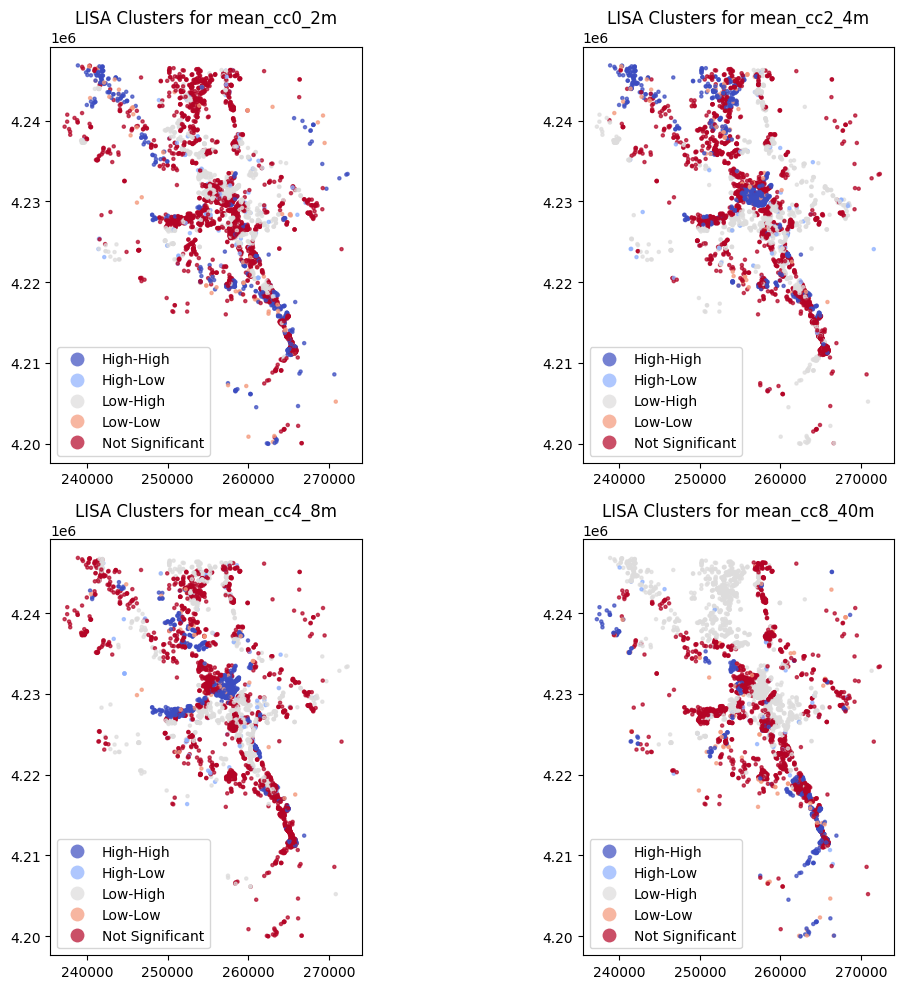

In [50]:
import matplotlib.pyplot as plt

# Define the 2x2 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# List of canopy cover columns
canopy_columns = ["mean_cc0_2m", "mean_cc2_4m", "mean_cc4_8m", "mean_cc8_40m"]

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each canopy cover column
for i, col in enumerate(canopy_columns):
    local_moran_col = f"local_moran_{col}"  # Corresponding Moran's I column
    local_p_col = f"p_{col}" # Corresponding p-value

    # Define significant clusters (p < 0.05)
    gdf[f"lisa_cluster_{col}"] = "Not Significant"
    gdf.loc[(gdf[local_moran_col] > 0) & (gdf[local_p_col] < 0.05), f"lisa_cluster_{col}"] = "High-High"
    gdf.loc[(gdf[local_moran_col] < 0) & (gdf[local_p_col] < 0.05), f"lisa_cluster_{col}"] = "Low-Low"
    gdf.loc[(gdf[local_moran_col] > 0) & (gdf[local_p_col] < 0.05) & (gdf[col] < gdf[col].mean()), f"lisa_cluster_{col}"] = "Low-High"
    gdf.loc[(gdf[local_moran_col] < 0) & (gdf[local_p_col] < 0.05) & (gdf[col] > gdf[col].mean()), f"lisa_cluster_{col}"] = "High-Low"

    # Plot LISA clusters
    gdf.plot(column=f"lisa_cluster_{col}", categorical=True, legend=True, ax=axes[i], cmap="coolwarm", markersize=5, alpha=0.7)
    axes[i].set_title(f"LISA Clusters for {col}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [51]:
# spatial autocorrelation for min_ssd
y = gdf['min_ssd'].values
moran = esda.moran.Moran(y, w)

print(f"Moran's I: {moran.I: .4f}")
print(f"p-value: {moran.p_sim: .4f}")

Moran's I:  0.1735
p-value:  0.0010


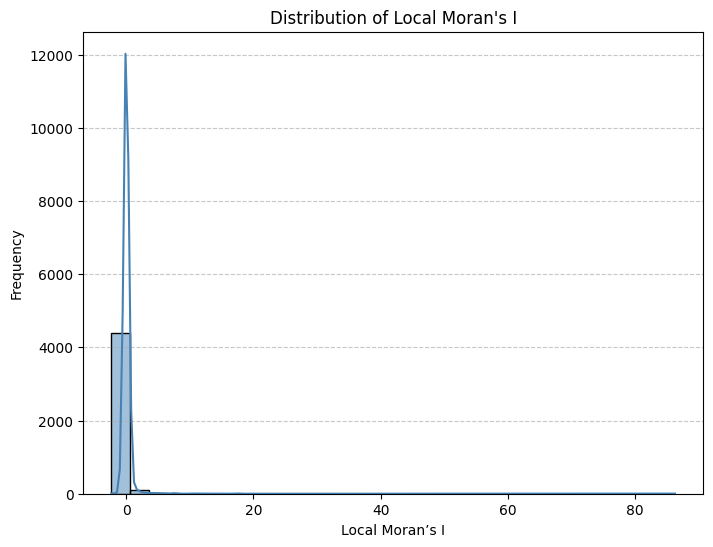

In [52]:
# Compute Local Moran's I
lisa = esda.moran.Moran_Local(y, w)

# Add results to gdf for mapping
gdf["local_moran_ssd"] = lisa.Is
gdf["p_value_ssd"] = lisa.p_sim

# Plot Local Moran's I values
plt.figure(figsize=(8, 6))
sns.histplot(gdf["local_moran_ssd"], bins=30, kde=True, color="steelblue")
plt.xlabel("Local Moran’s I")
plt.ylabel("Frequency")
plt.title("Distribution of Local Moran's I")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

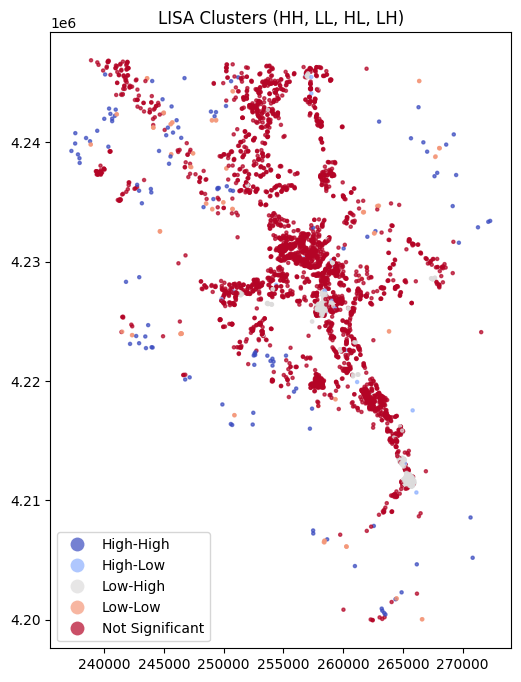

In [54]:
import matplotlib.pyplot as plt

# Define significant clusters (p < 0.05)
gdf["lisa_cluster_ssd"] = "Not Significant"
gdf.loc[(gdf["local_moran_ssd"] > 0) & (gdf["p_value_ssd"] < 0.05), "lisa_cluster_ssd"] = "High-High"
gdf.loc[(gdf["local_moran_ssd"] < 0) & (gdf["p_value_ssd"] < 0.05), "lisa_cluster_ssd"] = "Low-Low"
gdf.loc[(gdf["local_moran_ssd"] > 0) & (gdf["p_value_ssd"] < 0.05) & (gdf["min_ssd"] < gdf["min_ssd"].mean()), "lisa_cluster_ssd"] = "Low-High"
gdf.loc[(gdf["local_moran_ssd"] < 0) & (gdf["p_value_ssd"] < 0.05) & (gdf["min_ssd"] > gdf["min_ssd"].mean()), "lisa_cluster_ssd"] = "High-Low"

# Plot the LISA clusters
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column="lisa_cluster_ssd", categorical=True, legend=True, ax=ax, cmap="coolwarm", markersize=5, alpha=0.7)
plt.title("LISA Clusters (HH, LL, HL, LH)")
plt.show()

In [55]:
# spatial autocorrelation for intersections
y = gdf['intersections'].values
moran = esda.moran.Moran(y, w)

print(f"Moran's I: {moran.I: .4f}")
print(f"p-value: {moran.p_sim: .4f}")

Moran's I:  0.8063
p-value:  0.0010


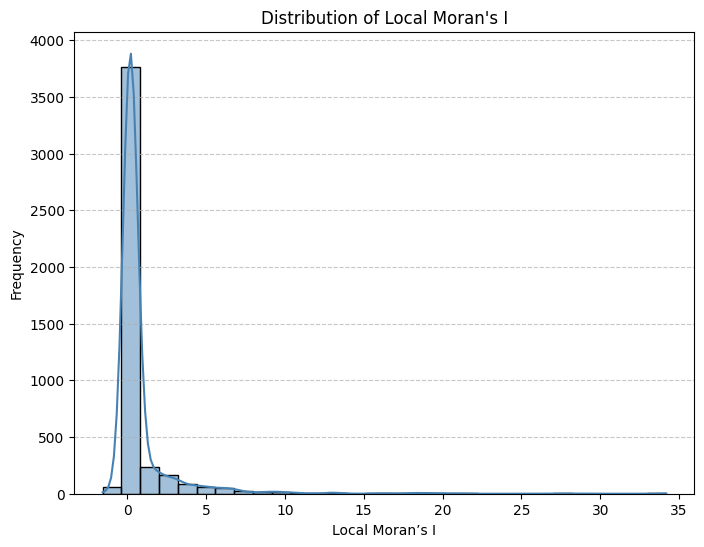

In [56]:
# Compute Local Moran's I
lisa = esda.moran.Moran_Local(y, w)

# Add results to gdf for mapping
gdf["local_moran_intx"] = lisa.Is
gdf["p_value_intx"] = lisa.p_sim

# Plot Local Moran's I values
plt.figure(figsize=(8, 6))
sns.histplot(gdf["local_moran_intx"], bins=30, kde=True, color="steelblue")
plt.xlabel("Local Moran’s I")
plt.ylabel("Frequency")
plt.title("Distribution of Local Moran's I")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

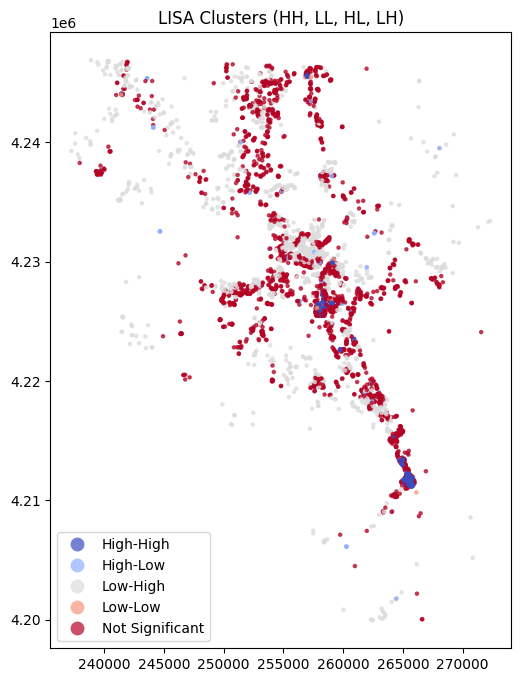

In [57]:
import matplotlib.pyplot as plt

# Define significant clusters (p < 0.05)
gdf["lisa_cluster_intx"] = "Not Significant"
gdf.loc[(gdf["local_moran_intx"] > 0) & (gdf["p_value_intx"] < 0.05), "lisa_cluster_intx"] = "High-High"
gdf.loc[(gdf["local_moran_intx"] < 0) & (gdf["p_value_intx"] < 0.05), "lisa_cluster_intx"] = "Low-Low"
gdf.loc[(gdf["local_moran_intx"] > 0) & (gdf["p_value_intx"] < 0.05) & (gdf["intersections"] < gdf["intersections"].mean()), "lisa_cluster_intx"] = "Low-High"
gdf.loc[(gdf["local_moran_intx"] < 0) & (gdf["p_value_intx"] < 0.05) & (gdf["intersections"] > gdf["intersections"].mean()), "lisa_cluster_intx"] = "High-Low"

# Plot the LISA clusters
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column="lisa_cluster_intx", categorical=True, legend=True, ax=ax, cmap="coolwarm", markersize=5, alpha=0.7)
plt.title("LISA Clusters (HH, LL, HL, LH)")
plt.show()

Now let's isolate the homes that have 0 'intersections' (aka there are no adjacent homes in the defensible space). 

In [ ]:
#  Filter for first 9 columns and select rows where intersections is 0
gdf1 = gdf.loc[gdf['intersections'] == 0, gdf.columns[:9]].copy()
gdf1.head()

,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,geometry
2,Ouray County,1,213.672097,0.032280,0.038839,0.006272,0.000000,0,POINT (251212.196 4245423.292)
3,Ouray County,5,183.675975,0.063696,0.097281,0.033223,0.082861,0,POINT (244097.801 4241432.894)
4,Ouray County,5,101.386718,0.037428,0.219677,0.253634,0.000842,0,POINT (254078.896 4242776.879)
9,Ouray County,5,58.957532,0.033025,0.174543,0.170631,0.000000,0,POINT (251323.44 4237717.93)
11,Ouray County,5,64.935003,0.046529,0.101665,0.364209,0.067428,0,POINT (255923.804 4236243.043)


In [60]:
gdf1.shape

(1579, 9)

<Axes: >

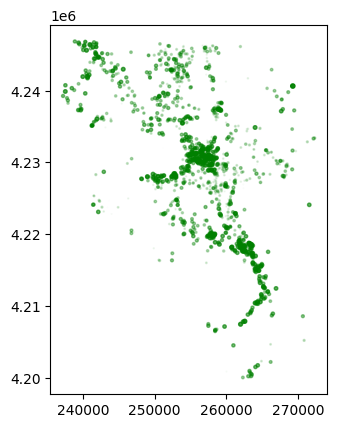

In [61]:
# Create new column for sum_cc
gdf1['sum_cc'] = gdf1[['mean_cc0_2m', 'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m']].sum(axis=1)
# Plot varying point size and alpha by sum_cc
gdf1.plot(markersize=gdf1["sum_cc"] * 10, alpha=gdf1['sum_cc'], color="green")


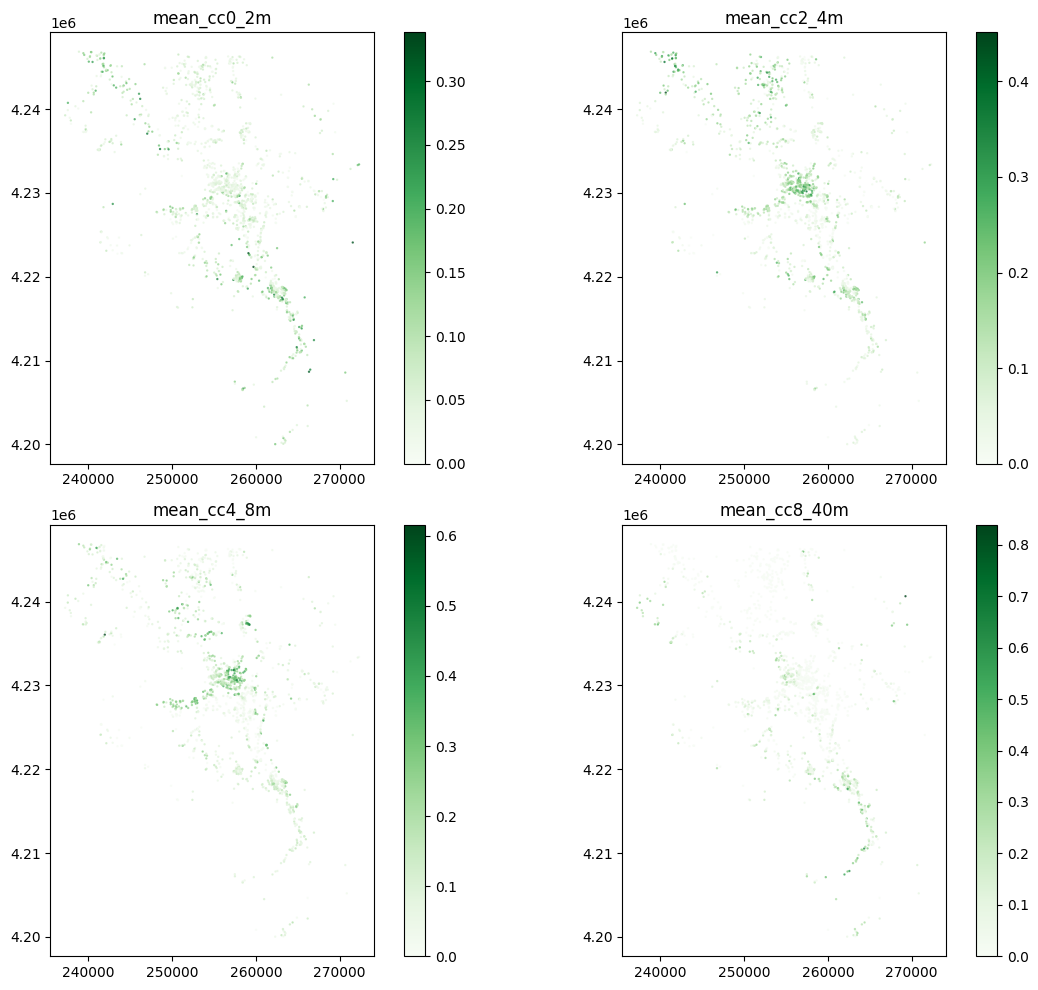

In [64]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

canopy_columns = ["mean_cc0_2m", "mean_cc2_4m", "mean_cc4_8m", "mean_cc8_40m"]

axes = axes.flatten()
# Loop through each canopy cover column
for i, col in enumerate(canopy_columns):
    
    gdf1.plot(column=col, legend=True, ax=axes[i], cmap="Greens", markersize=.5, alpha=.7)
    axes[i].set_title(f"{col}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<Axes: >

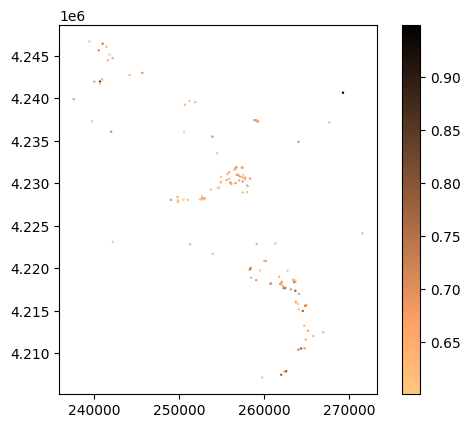

In [72]:
# Isolated homes with > 60% fuel cover in defensible space
gdf1[gdf1['sum_cc'] >= .6].plot(column='sum_cc', legend=True, markersize=.5, cmap='copper_r', alpha=1)

In [73]:
gdf1[gdf1['sum_cc'] >= .6].shape

(135, 10)

There are 135 homes in Ouray County that have more than 60% vegetation cover in their defensible space and do not have adjacent homes within ~30m. These are the structures that could most greatly benefit from reducing fuels in defensible space. 

We can keep track of these homes for when we do the tax assessment analysis to see if there is any overlap.

Now let's just do one more thing for now. It would be interesting to say the number of homes that have defensible space that extends outside of the parcel boundary. So we will bring in the hiz geoms and parcel geoms. We're going to assign a PARCELNB to building centroids based on where the centroid falls in the parcel, making sure to allow for multiple centroids per parcel. There will be one PARCELNB per centroid. Then, since the centroids and hiz boundaries are indexed the same, we will be able to determine which HIZ boundary is in which parcel. We'll discuss next steps after that. 

In [47]:
import geopandas as gpd
import pandas as pd 

geoms = os.path.join(data, 'county_geoms')

pd.set_option('display.max_columns', None)
parcels = gpd.read_file(os.path.join(geoms, 'parcels_WKID26913.gpkg'))
parcels.head()

,ACCOUNT,PARCELNB,LAND_STATU,EditStatus,EDIT_STATU,MS_Number,MS_Name,ACRES_calc,ACCT_URL,Note,NAMEADDRID,NAMETYPE,NAME,ADDRESS1,ADDRESS2,CITY,STATE,ZIPCODE,ACCTTYPE,STREETNO,EXTENT,DIRECTION,STREETNAME,DESIGNATIO,DIRECTIONS,SUFFIX,UNITNUMBER,LOCCITY,ZIPCODE1,SUBNAME,CONDONAME,SALEP,SALEDT,ACRES,geometry
0,R001040,451531416002,Private,None,None,None,None,0.081725,https://ouraycountyco-assessor.tylerhost.net/a...,None,None,None,THOMPSON ANDY,None,PO BOX 845,OURAY,CO,81427,11120.0,306.0,None,None,5TH,ST,None,None,0.0,Ouray,81427.0,KERSEN MINOR SUBD,None,280000.0,2003-03-11,0.082,"POLYGON ((265722.291 4211367.135, 265721.762 4..."
1,R001048,451531416001,Private,None,None,None,None,0.081809,https://ouraycountyco-assessor.tylerhost.net/a...,None,None,None,DUNN J GARY,None,PO BOX G,OURAY,CO,81427,11120.0,434.0,None,None,3RD,AVE,None,None,0.0,Ouray,81427.0,KERSEN MINOR SUBD,None,125000.0,1998-05-28,0.082,"POLYGON ((265700.632 4211367.803, 265700.148 4..."
2,R000043,451531401002,Private,OK,None,None,None,0.445740,https://ouraycountyco-assessor.tylerhost.net/a...,5/15/08: matches deed@ 118077,None,None,ARMSTRONG ALDEN A,None,401 RANA COURT,GRAND JUNCTION,CO,81507,11120.0,403.0,None,None,6TH,ST,None,None,0.0,Ouray,81427.0,CITY OF OURAY,None,26000.0,1972-10-18,0.470,"MULTIPOLYGON (((265942.8 4211497.821, 265942.0..."
3,R001728,451531415002,Private,OK,None,None,None,11.926000,https://ouraycountyco-assessor.tylerhost.net/a...,"7/14/10: matches legal, plat @ 142134",None,None,SCOTT R EVANS & TIFFIN E EVANS JOINT REVOCABLE...,None,24185 SCHUETZENGROUND ROAD,WARRENTON,MO,63383,5400.0,0.0,None,None,None,None,None,None,0.0,Ouray,81427.0,MILLER EXEMPT,None,0.0,2013-08-21,11.980,"POLYGON ((265793.203 4211020.474, 265803.351 4..."
4,R001721,451531415003,Private,OK,None,None,None,9.459770,https://ouraycountyco-assessor.tylerhost.net/a...,"7/14/10: matches legal, plat @ 142134",None,None,CONRAD DAVID,None,PO BOX 1791,OURAY,CO,81427,11120.0,209.0,None,None,GOLDEN CRYSTAL,TRL,None,None,0.0,Ouray,81427.0,MILLER EXEMPT,None,0.0,2000-02-28,9.390,"POLYGON ((266284.428 4210798.267, 266265.46 42..."


In [48]:
mbf = gpd.read_file(os.path.join(scratch, 'centr_wui_ssd_count_rast.gpkg'))
mbf.head()

,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,geometry
0,Ouray County,5,221.938317,NaN,NaN,NaN,NaN,0,POINT (233065.909 4241052.6)
1,Ouray County,5,11.936200,0.079294,0.119998,0.066202,0.003467,2,POINT (242785.257 4243534.402)
2,Ouray County,1,213.672097,0.032280,0.038839,0.006272,0.000000,0,POINT (251212.196 4245423.292)
3,Ouray County,5,183.675975,0.063696,0.097281,0.033223,0.082861,0,POINT (244097.801 4241432.894)
4,Ouray County,5,101.386718,0.037428,0.219677,0.253634,0.000842,0,POINT (254078.896 4242776.879)


In [6]:
hiz = gpd.read_file(os.path.join(scratch, 'hiz_raster_WKID26913.gpkg'))
hiz.head()

,mean_cc0_2m,mean_cc_2_4m,mean_cc4_8m,mean_cc8_40m,geometry
0,NaN,NaN,NaN,NaN,"POLYGON ((233082.966 4241022.314, 233080.295 4..."
1,0.079294,0.119998,0.066202,0.003467,"POLYGON ((242805.059 4243571.853, 242808.129 4..."
2,0.032280,0.038839,0.006272,0.000000,"POLYGON ((251182.204 4245395.048, 251179.74 42..."
3,0.063696,0.097281,0.033223,0.082861,"POLYGON ((244062.393 4241433.743, 244062.359 4..."
4,0.037428,0.219677,0.253634,0.000842,"POLYGON ((254114.554 4242761.882, 254113.584 4..."


In [49]:
# Perform spatial join, keeping only PARCELNB from parcels
mbf = gpd.sjoin(mbf, parcels[['geometry', 'PARCELNB', 'ACCOUNT', 'ACRES_calc']], how='left', predicate='within')
# Drop extra index column that sjoin adds
mbf.drop(columns=['index_right'], inplace=True)

mbf.head()

,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,geometry,PARCELNB,ACCOUNT,ACRES_calc
0,Ouray County,5,221.938317,NaN,NaN,NaN,NaN,0,POINT (233065.909 4241052.6),403535300013,R002619,40.3299
1,Ouray County,5,11.936200,0.079294,0.119998,0.066202,0.003467,2,POINT (242785.257 4243534.402),403726200085,R002417,35.8913
2,Ouray County,1,213.672097,0.032280,0.038839,0.006272,0.000000,0,POINT (251212.196 4245423.292),403915300016,R004080,40.1202
3,Ouray County,5,183.675975,0.063696,0.097281,0.033223,0.082861,0,POINT (244097.801 4241432.894),403736200037,R002506,39.7779
4,Ouray County,5,101.386718,0.037428,0.219677,0.253634,0.000842,0,POINT (254078.896 4242776.879),403925218002,R004877,16.5952


In [50]:
print(f'parcels with structures: {mbf['PARCELNB'].nunique()}')
print(f'parcels with > 1 structure: {4533 - mbf['PARCELNB'].nunique()}')
print(f'parcels with == 1 structure: {mbf['PARCELNB'].nunique() - (4533 - mbf['PARCELNB'].nunique())}')

parcels with structures: 2730
parcels with > 1 structure: 1803
parcels with == 1 structure: 927


In [51]:
# Check for duplicated buildings
duplicate_counts = mbf.index.value_counts()
duplicates = duplicate_counts[duplicate_counts > 1]
print(f"Number of buildings duplicated: {len(duplicates)}")
print(duplicates.head())  # Show a few examples

Number of buildings duplicated: 23
3558    23
3691    23
1498    14
3641    14
1694     5
Name: count, dtype: int64


In [52]:
# We will drop duplicate buildings, keeping the first matching parcel for each building
mbf = mbf.groupby(mbf.index).first()
len(mbf)

4533

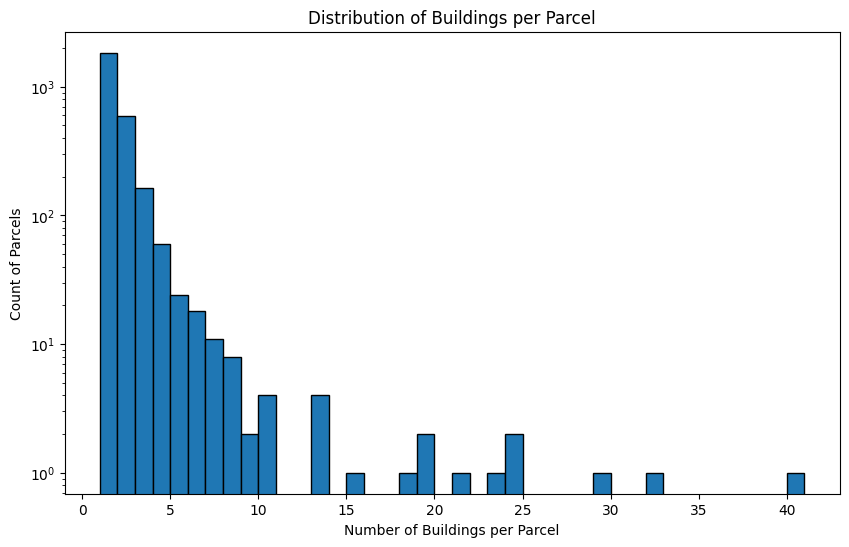

In [26]:
# Create histogram showing distributions of buildings in parcels
import matplotlib.pyplot as plt

# Count how many buildings are in each parcel
parcel_counts = mbf['PARCELNB'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(parcel_counts, bins=range(1, parcel_counts.max() + 2), edgecolor='black')

# Labels and title
plt.xlabel('Number of Buildings per Parcel')
plt.ylabel('Count of Parcels')
plt.title('Distribution of Buildings per Parcel')
plt.yscale('log')  # Log scale helps if there's a big spread

plt.show()


Now we're going to put parcel numbers to the hiz geodataframe. This is easy because it is indexed the same as mbf.

In [27]:
hiz['PARCELNB'] = mbf['PARCELNB']
hiz.head()

,mean_cc0_2m,mean_cc_2_4m,mean_cc4_8m,mean_cc8_40m,geometry,PARCELNB
0,NaN,NaN,NaN,NaN,"POLYGON ((233082.966 4241022.314, 233080.295 4...",403535300013
1,0.079294,0.119998,0.066202,0.003467,"POLYGON ((242805.059 4243571.853, 242808.129 4...",403726200085
2,0.032280,0.038839,0.006272,0.000000,"POLYGON ((251182.204 4245395.048, 251179.74 42...",403915300016
3,0.063696,0.097281,0.033223,0.082861,"POLYGON ((244062.393 4241433.743, 244062.359 4...",403736200037
4,0.037428,0.219677,0.253634,0.000842,"POLYGON ((254114.554 4242761.882, 254113.584 4...",403925218002


In [53]:
# Looks like the CRS got dropped in the spatial join so we will assign it again
mbf.set_crs(26913, inplace=True)
mbf.crs

<Projected CRS: EPSG:26913>
Name: NAD83 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 108°W and 102°W - onshore and offshore. Canada - Northwest Territories; Nunavut; Saskatchewan. United States (USA) - Colorado; Montana; Nebraska; New Mexico; North Dakota; Oklahoma; South Dakota; Texas; Wyoming.
- bounds: (-108.0, 28.98, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [34]:
# Save to scratch files
mbf.to_file(os.path.join(scratch, 'centr_hiz_parcel.gpkg'), driver='GPKG', index=False)
hiz.to_file(os.path.join(scratch, 'hiz_parcel.gpkg'), driver='GPKG', index=False)

Now we're going to see how many homes there are with hiz boundaries that extend beyond the parcel boundary. To do this, we'll use PARCELNB.

In [36]:
# Create a dictionary mapping of PARCELNB to its parcel geometry
parcel_geom_dict = parcels.set_index('PARCELNB')['geometry'].to_dict()
# Check if each HIZ polygon is fully within its assigned parcel
hiz['extends_outside'] = hiz.apply(
    lambda row: not row.geometry.within(parcel_geom_dict[row.PARCELNB]) if row.PARCELNB in parcel_geom_dict else None,
    axis=1
)

# Count how many HIZ polygons extend beyond their assigned parcel
num_outside = hiz['extends_outside'].sum()

print(f"Number of buildings with HIZ polygons extending beyond their parcel: {num_outside}")


Number of buildings with HIZ polygons extending beyond their parcel: 3204


In [39]:
hiz.to_file(os.path.join(scratch, 'hiz_parcel.gpkg'), driver='GPKG', index=False)

In the plot below, we can see which buildings have HIZs that extend outside of the actual property boundary. This is the vast majority of homes in the county (3204/4533 = 70.68% of structures). 

<Axes: >

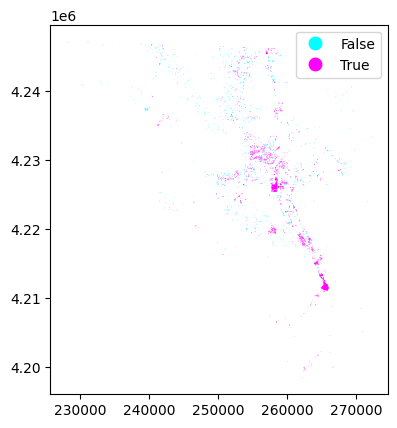

In [45]:
hiz.plot(column='extends_outside', cmap='cool', legend=True)

In [54]:
# We'll join the 'extends_outside' column to mbf and save to scratch file
mbf['hiz_ext_out'] = hiz['extends_outside']
mbf.to_file(os.path.join(scratch, 'centr_hiz_parcel.gpkg'), driver='GPKG', index=False)

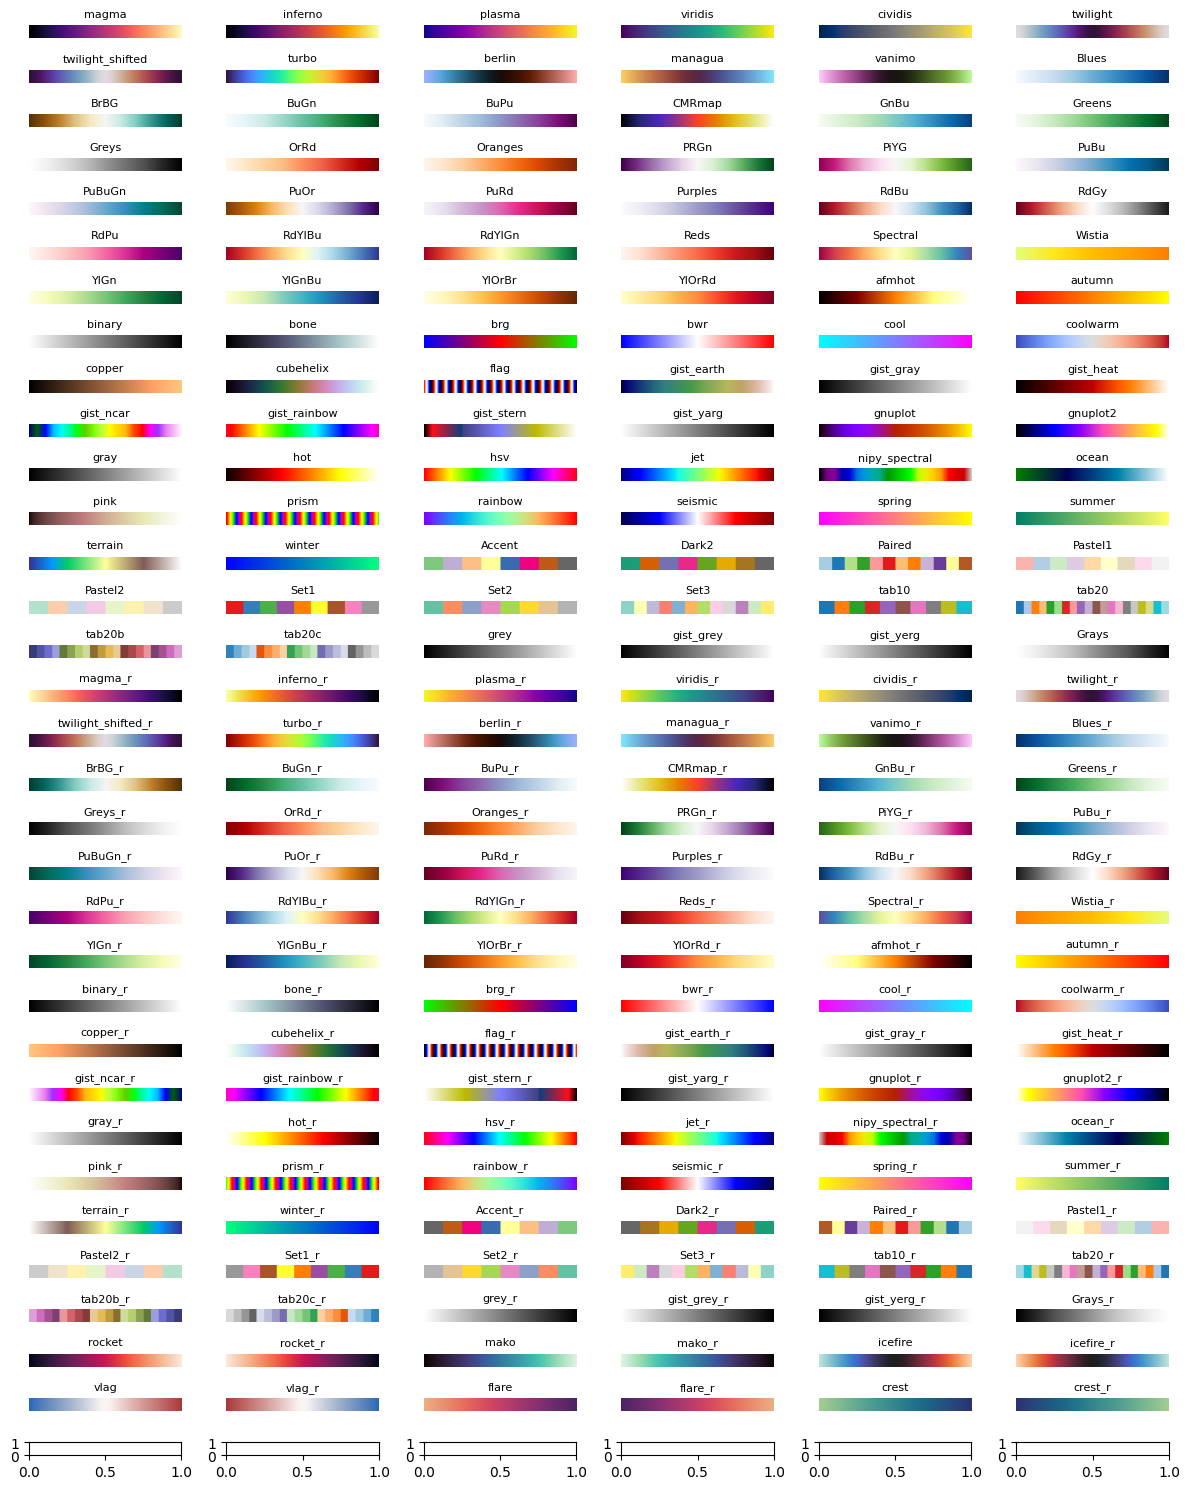

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Get a list of all colormaps
colormaps = plt.colormaps()

# Create a figure
fig, axes = plt.subplots(nrows=len(colormaps)//6 + 1, ncols=6, figsize=(12, 15))
axes = axes.flatten()

# Generate a gradient to show colormaps
gradient = np.linspace(0, 1, 256).reshape(1, -1)

# Plot each colormap
for ax, cmap in zip(axes, colormaps):
    ax.imshow(gradient, aspect="auto", cmap=cmap)
    ax.set_title(cmap, fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()

The next notebook in this process is going to be `analysis/tax_analysis.ipynb`. In that notebook, we will take the scratch gdf we just created and join the tax assessor data.